In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)
%matplotlib inline

# What is wrong with my Apple Tree (Malus domestica)?

In [2]:
# LET'S UPLOAD THE IMAGE YOU WANT, PUT THE DOWNLOAD IMAGE IN THE FOLDER 'IMAGES'

## How does my picture look like?
If you have put an image in the folder we should be able to see it below (all .jpeg,.jpg and .png formats are good!). Name it whatever you want.

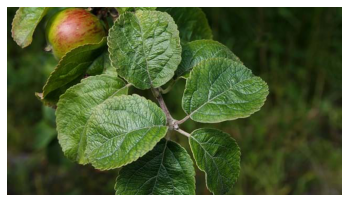

In [14]:
for photo in glob.glob('images/*/*.*'):
    img = mpimg.imread(photo)
    imgplot = plt.imshow(img)
    plt.axis('off')

## Preprocessing of the image

Photo needs to be ready to get passed through the VG altered model

In [15]:
# first we need the path of the photo

test_path= 'images'

# then we need to do the preprocessing for the VG model

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes = None, class_mode = None, batch_size=10, shuffle=False)


Found 1 images belonging to 1 classes.


## Loading the Apples Model

In [26]:
filepath = '/Users/mireiaguinovart/Documents/Ironhack/project_8/Project-Week-8-Final-Project/your-project/modelApples_google2'
apples_model = keras.models.load_model(filepath)

## Predicting the Image

In [16]:
predictions = apples_model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [22]:
labels = {'healthy': 0, 'rot': 1, 'rust': 2, 'scab': 3}

In [17]:
# numerical prediction in the form of array

np.round(predictions)

array([[0., 0., 1., 0.]], dtype=float32)

### Prediction labels

In [18]:
image_pred = int(np.argmax(np.round(predictions,2),axis=1))

In [21]:

def get_prediction(labels): 
    for key, value in labels.items(): 
         if image_pred == value: 
            return key

In [23]:
# running the function to obtain the prediction

get_prediction(labels)

'rust'

## Prediction function

In [27]:
def prediction ():
    
    #preprocessing for the VG model
    test_path= 'images'
    test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes = None, class_mode = None, batch_size=10, shuffle=False)
    
    #loading the model
    modelepath = '/Users/mireiaguinovart/Documents/Ironhack/project_8/Project-Week-8-Final-Project/your-project/modelApples_google2'
    apples_model = keras.models.load_model(modelpath)
    
    #predictions
    predictions = apples_model.predict(x=test_batches, steps=len(test_batches), verbose=0)
    labels = {'healthy': 0, 'rot': 1, 'rust': 2, 'scab': 3}
    for key, value in labels.items(): 
         if image_pred == value:
            if key=='healthy':
                print('Your apple tree is ', key, ' do not worry!')
            else:
                print("Your apple tree has", key, "we'll find a solution!")
            